# Q6

In [47]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow

## part a

<h3> in this section we want to implement : </h3>

1.   Averaging Blurring
2.   Median Blurring
3.   Gaussian Blurring

<h3> you should define reflect101 padding function and use it befor blurring </h3>
<h3><b> note : you can't use libraries in this section </b></h3>
<h3><b> note : you can't use loop in Reflect101 function </b></h3>




In [48]:
def Reflect101(img,filter_size):
  '''
    Do not use loop (like while and for)
    Do not use libraries
    calculate averaging filter
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      image (ndarray): computed Reflect101
  '''

  m=filter_size-1
  image=np.zeros((img.shape[0]+filter_size-1,img.shape[1]+filter_size-1))
  a=image.shape[0]
  b=image.shape[1]
  x=int((m)/2)
  y=int((m)/2)
  jbj=a+x-1
  #badane asli
  image[x:a-x, y: b-y] = img
  #bala
  image[0:x,:] = image[2*x:x:-1,:]
  #payiin
  image[jbj+1:,:] = image[jbj-1:jbj-1-x:-1,:]
  #chap
  image[:,0:x] = image[:,2*x:x:-1]
  #rast
  image[:,jbj+1:] = image[:,jbj-1:jbj-1-x:-1]
  
  return image

In [49]:
def Averaging_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed averaging blurring
  '''
  
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))
  #######################
  #    your code here   #
  #######################
  x,y=img.shape
  m,n=filter_size,filter_size
  # m_h,n_h=filter_size//2,filter_size//2
  for i in range(x):
    for j in range(y):
      result[i,j]=np.average(image[i:i+m,j:j+n])
  return result

In [50]:
def Median_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed median blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))
  a,b= img.shape
  x,y=filter_size,filter_size
  for i in range(a):
    for j in range(b):
        result[i,j]=np.median(image[i:i+x,j:j+y])
  #######################
  #    your code here   #
  #######################
  
  return result

In [51]:
def Gaussian_Blurring(img, filter_size, std):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): std of gaussian kernel
    output(s):
      result (ndarray): computed gaussian blurring
    '''
    kernel = np.zeros((filter_size,filter_size))
    #######################
    #    your code here   #
    #######################
    output = img.copy()
    a,b=kernel.shape
    x_h,y_h=a//2,b//2
    ma=2*std**2
    for i in range(a):
      for j in range(b):
        s=i-x_h
        t=j-y_h
        kernel[i,j]=np.exp(-(s**2+t**2)/ma)
    kernel=kernel/np.sum(kernel)    
    result = cv2.filter2D(src = output, ddepth = -1, kernel = kernel)
    return result

In [52]:
# Do not change this cell
image = cv2.imread('./images/taj.jpg',cv2.IMREAD_GRAYSCALE)

(-0.5, 299.5, 299.5, -0.5)

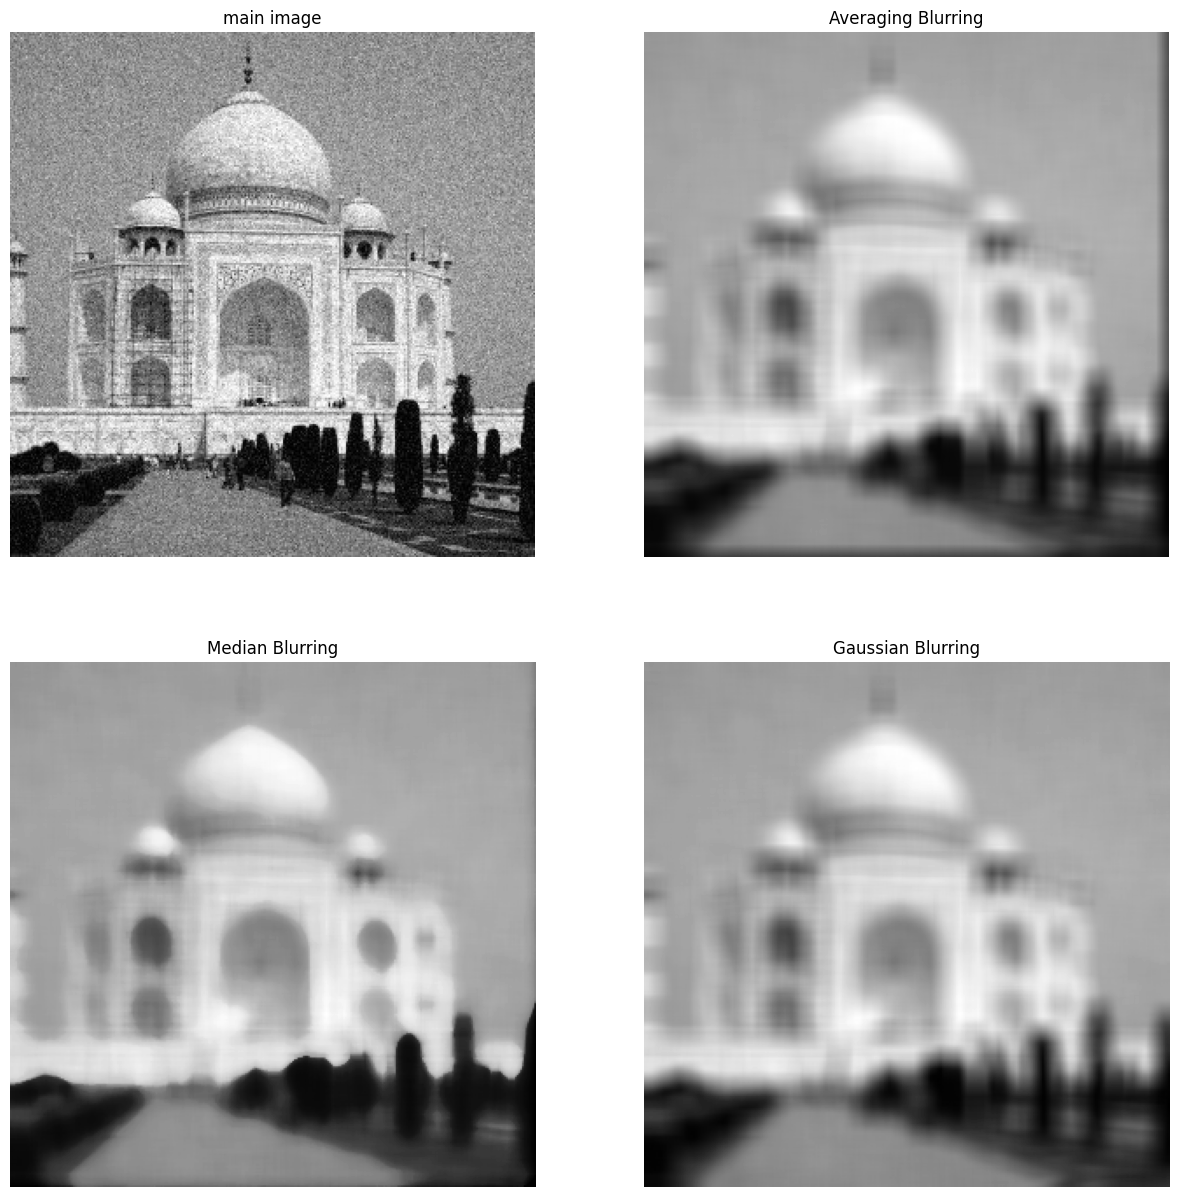

In [53]:
# Do not change this cell
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title("main image")
plt.axis("off")

AB = Averaging_Blurring(image,15)
plt.subplot(2,2,2)
plt.imshow(AB,cmap='gray')
plt.title("Averaging Blurring")
plt.axis("off")

MB = Median_Blurring(image,15)
plt.subplot(2,2,3)
plt.imshow(MB,cmap='gray')
plt.title("Median Blurring")
plt.axis("off")

GB = Gaussian_Blurring(image,15,40)
plt.subplot(2,2,4)
plt.imshow(GB,cmap='gray')
plt.title("Gaussian Blurring")
plt.axis("off")


## part b

<h3> in this section we want to implement Bilateral Filtering </h3>
<h3> first you need to read about it and write about it in your report </h3>
<h3><b> note : you can't use libraries in this section </b></h3>


In [54]:
def Bilateral_Filtering(img, filter_size, std, rstd):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): value of std in the coordinate space
      rstd (float): value of std in the color space
    output(s):
      result (ndarray): computed Bilateral blurring
    '''
    result = img.copy()
    #######################
    #    your code here   #
    #######################
    return result

In [55]:
# Do not change this cell
bilateral = Bilateral_Filtering(image, 15, 40, 40)
cv2.imshow(bilateral)

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


## part c

<h3> in this section we want to implement all blurrings with opencv and compare their with part b </h3>
<h3><b> note : for comparison, the parameters should be the same as in part b </b></h3>

In [ ]:
AveragingBlurring = cv2.blur(image,(15,15))
MedianBlurring = cv2.medianBlur(image,15)
GaussianBlurring = cv2.GaussianBlur(image,(15,15),cv2.BORDER_REFLECT_101)
Bilateral = cv2.bilateralFilter(image,15,40,40)

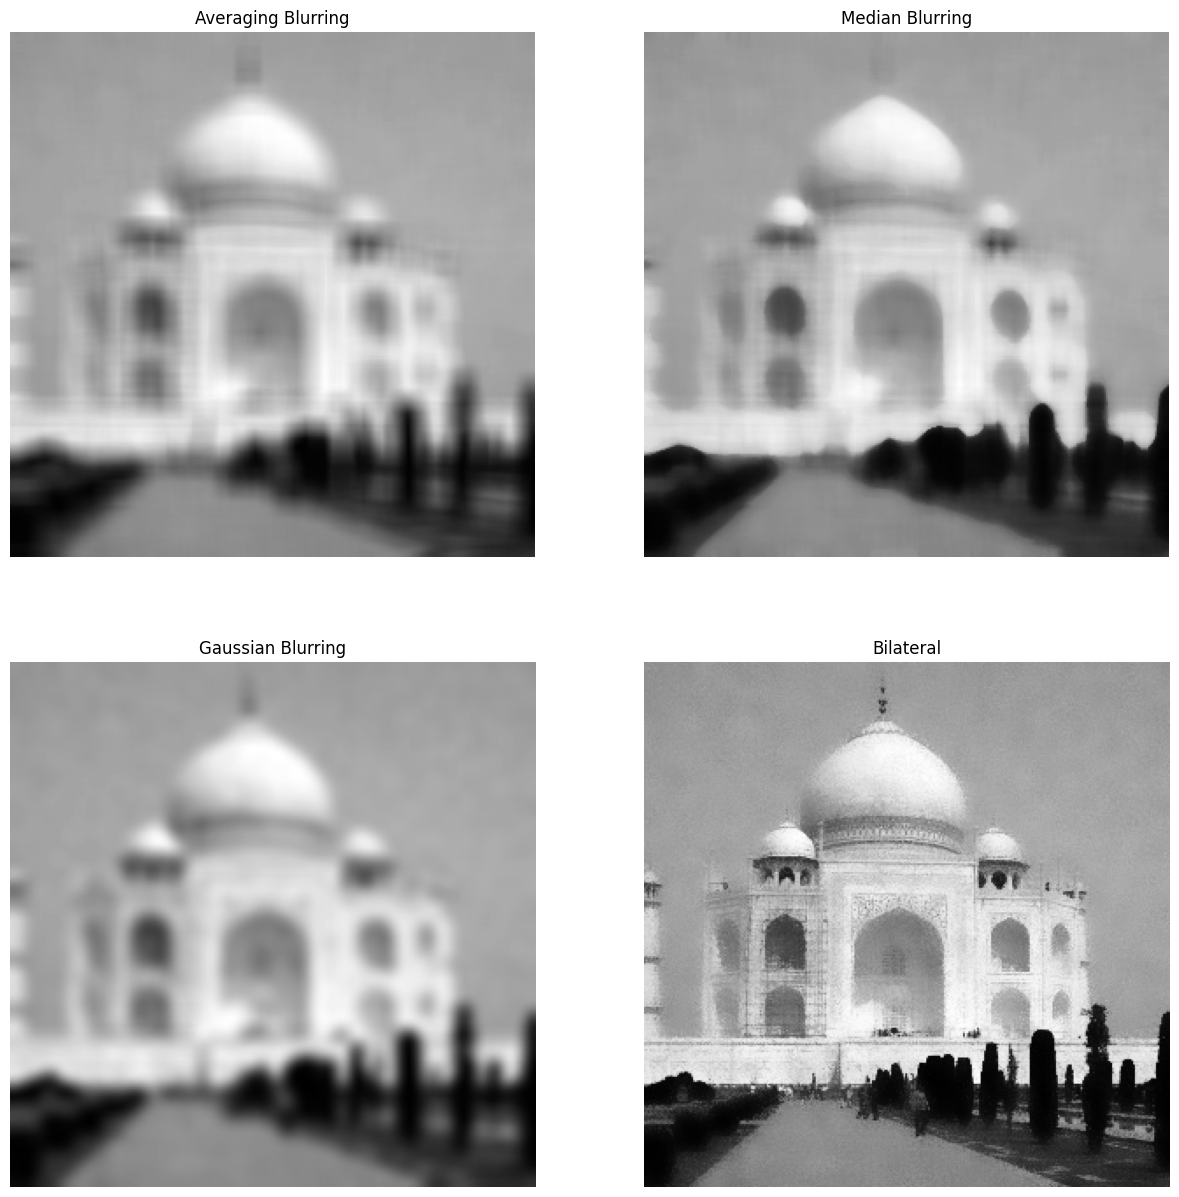

In [ ]:
# Do not change this cell
Array = [AveragingBlurring, MedianBlurring, GaussianBlurring, Bilateral]
titles = ['Averaging Blurring', 'Median Blurring', 'Gaussian Blurring', 'Bilateral']
plt.figure(figsize=(15,15))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(Array[i],cmap='gray')
  plt.title(titles[i])
  plt.axis("off")